# Text-to-Image using Stable Diffusion 1.5

<a target="_blank" href="https://colab.research.google.com/github/simonguest/CS-394/blob/main/src/04/notebooks/text-to-image-sd-1.5.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://github.com/simonguest/CS-394/raw/refs/heads/main/src/04/notebooks/text-to-image-sd-1.5.ipynb">
  <img src="https://img.shields.io/badge/Download_.ipynb-blue" alt="Download .ipynb"/>
</a>

In [1]:
import torch
from diffusers import StableDiffusionPipeline

# Load a small diffusion model
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
)

# Move to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Show Intermediate Steps

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:899: FutureWarning: `callback` is deprecated and will be removed in version 1.0.0. Passing `callback` as an input argument to `__call__` is deprecated, consider using `callback_on_step_end`
  deprecate(
/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:905: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider using `callback_on_step_end`
  deprecate(


  0%|          | 0/50 [00:00<?, ?it/s]

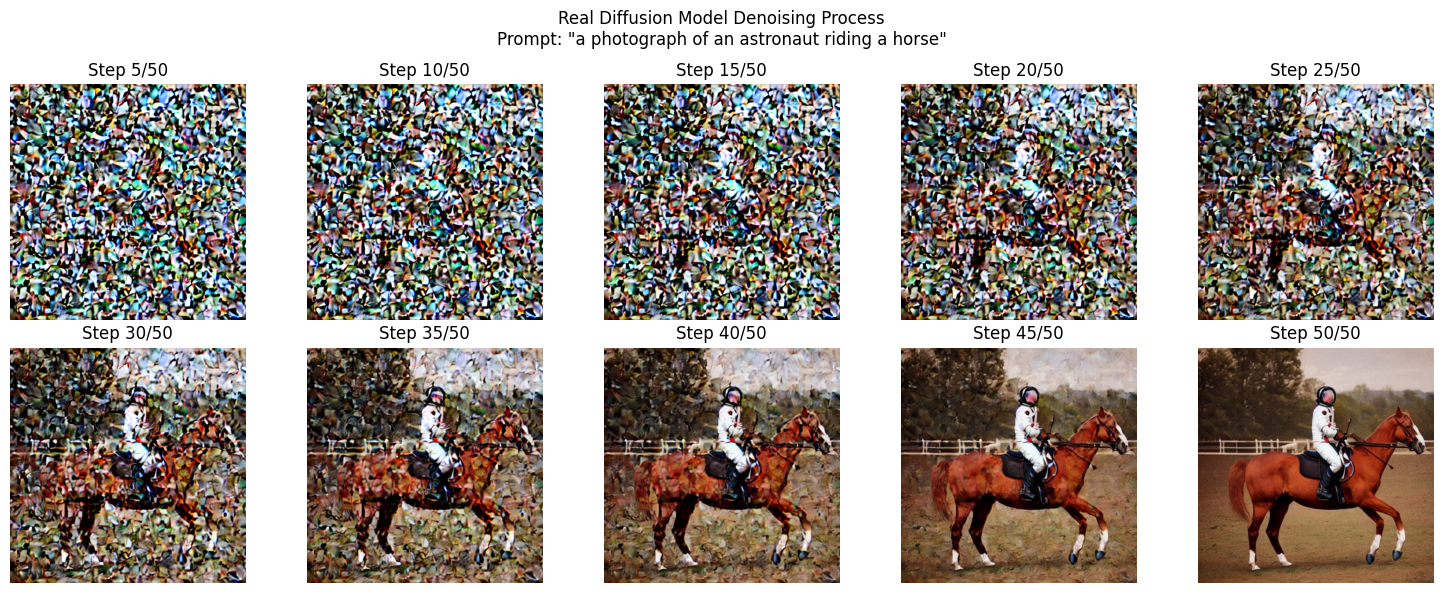

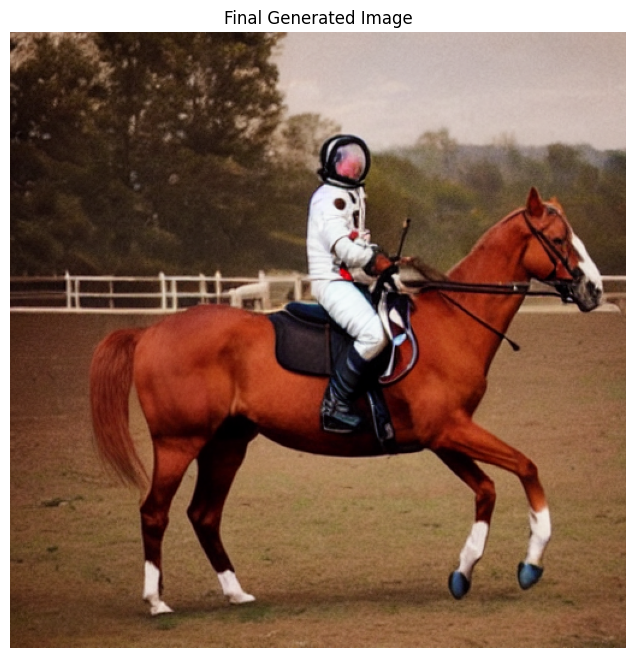

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PROMPT = "a photograph of an astronaut riding a horse" #@param {type:"string"}
STEPS = 50 #@param {type:"slider", min:10, max:100, step:1}

intermediate_images = []

def callback_fn(step, timestep, latents):
    """Capture intermediate denoising steps"""
    # Decode latents to image every few steps
    if step % 5 == 0 or step == 0:
        with torch.no_grad():
            # Decode the latent representation to an image
            image = pipe.vae.decode(latents / pipe.vae.config.scaling_factor, return_dict=False)[0]
            image = pipe.image_processor.postprocess(image, output_type="pil")[0]
            intermediate_images.append((step, image))

result = pipe(
    PROMPT,
    num_inference_steps=STEPS,
    callback=callback_fn,
    callback_steps=1,
).images[0]

# Visualize the denoising process
num_steps_to_show = min(10, len(intermediate_images))
step_indices = np.linspace(0, len(intermediate_images)-1, num_steps_to_show, dtype=int)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle(f'Real Diffusion Model Denoising Process\nPrompt: "{PROMPT}"')

for idx, step_idx in enumerate(step_indices):
    row = idx // 5
    col = idx % 5
    step_num, img = intermediate_images[step_idx]

    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Step {step_num}/{STEPS}')

plt.tight_layout()
plt.savefig('diffusion_process.png', dpi=150, bbox_inches='tight')
plt.show()

## Show Final Image

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(result)
plt.axis('off')
plt.title('Final Generated Image')
plt.savefig('final_result.png', dpi=150, bbox_inches='tight')
plt.show()